In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nibabel as nib
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix
import os
import pandas as pd

import sys
sys.path.append('/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_fmri/analysis/01_level1')
from level1_utils import get_confounds

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [26]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/'
subnum = '01'
runnum = '1'

In [3]:
fn = os.path.join(data_path, 'sub-%s/func/sub-%s_task-bundles_run-%s_bold.json'%(subnum, subnum, runnum))
f = open(fn)
bold_sidecar = json.load(f)
f.close()

In [4]:
tr = float(bold_sidecar['RepetitionTime']) 
n_scans = max(bold_sidecar['time']['samples']['AcquisitionNumber'])
frame_times = np.arange(n_scans) * tr 

In [5]:
fn = os.path.join(data_path, 'sub-%s/func/sub-%s_task-bundles_run-%s_events.tsv' %(subnum, subnum, runnum))
events = pd.read_csv(fn, sep='\t')

In [6]:
fn = os.path.join(data_path, 'derivatives/sub-%s/func/sub-%s_task-bundles_run-%s_desc-confounds_timeseries.tsv'%(subnum, subnum, runnum))
confounds = pd.read_csv(fn,  sep='\t')

In [58]:
design_matrix = make_first_level_design_matrix(frame_times, 
                                               events[['onset', 'duration', 'trial_type']], 
                                               drift_model='cosine', 
                                               add_regs= get_confounds(confounds), 
                                               hrf_model='spm')

<AxesSubplot:label='conditions', ylabel='scan number'>

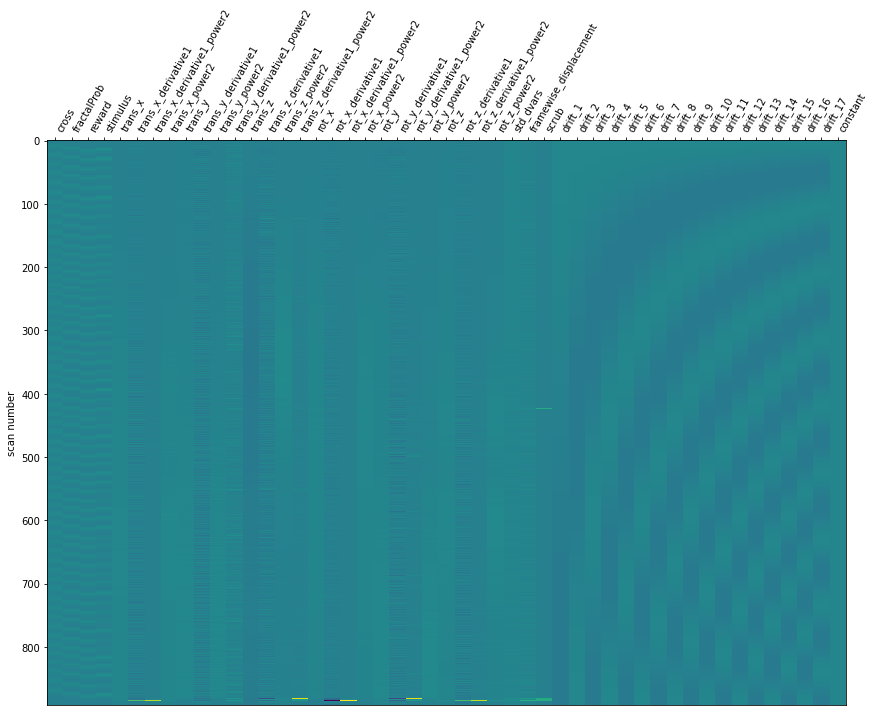

In [59]:
plot_design_matrix(design_matrix)

In [60]:
behavior_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/behavioral_data/all_trials.csv'
behavior = pd.read_csv(behavior_path)
behavior

,subnum,alpha,beta,delta,gamma,session,trialNum,referenceValue,referenceProb,numRewardedTrials,...,leftFractalBetter,conflictTrial,leftQVAdv,leftEVAdv,wpFrac,leftBundleVal,rightBundleVal,leftbundleValAdv,rpe,junk
0,1,0.101553,6.230820,0.378357,2.428627,1,1,1,0.5,35,...,False,conflict,0.000000,0.2,0.916436,0.058495,0.041782,0.016713,-0.058495,0
1,1,0.101553,6.230820,0.378357,2.428627,1,2,1,0.5,35,...,False,no conflict,0.000000,-0.4,1.000000,0.000000,0.000000,0.000000,0.000000,0
2,1,0.101553,6.230820,0.378357,2.428627,1,3,1,0.5,35,...,False,no conflict,0.000000,-0.4,0.001818,0.099818,0.499091,-0.399273,-0.099818,0
3,1,0.101553,6.230820,0.378357,2.428627,1,4,1,0.5,35,...,True,conflict,0.101553,0.0,0.012885,0.494866,0.493557,0.001309,-0.493557,0
4,1,0.101553,6.230820,0.378357,2.428627,1,5,1,0.5,35,...,False,conflict,-0.010313,0.2,0.046103,0.667253,0.476949,0.190304,-0.667253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,27,0.300630,7.683476,0.269414,0.418846,5,56,1,0.5,35,...,True,conflict,0.204734,-0.4,0.325006,0.142855,0.346313,-0.203458,0.653687,0
7496,27,0.300630,7.683476,0.269414,0.418846,5,57,1,0.5,35,...,False,conflict,-0.061549,0.2,0.158906,0.625462,0.467023,0.158438,1.374538,0
7497,27,0.300630,7.683476,0.269414,0.418846,5,58,1,0.5,35,...,True,conflict,0.319134,-0.2,0.212235,0.285400,0.375221,-0.089822,-0.375221,0
7498,27,0.300630,7.683476,0.269414,0.418846,5,59,1,0.5,35,...,False,no conflict,-0.095941,0.0,0.185226,0.394512,0.412283,-0.017771,0.605488,0


In [81]:
run_behavior = behavior.query('subnum == %d & session == %d'%(int(subnum), int(runnum)))

In [100]:
mean_cross_dur = float(np.mean(events.query('trial_type == "cross"')[['duration']]))
mean_cross_dur

8.463180852083376

In [110]:
cond_fractalProbParam = events.query('trial_type == "fractalProb"')[['onset', 'duration']]
cond_fractalProbParam['trial_type'] = 'fractalProbParam'
cond_fractalProbParam.reset_index(drop=True) 
cond_fractalProbParam['modulation'] = run_behavior['probFractalDraw'] - np.mean(run_behavior['probFractalDraw'])
cond_fractalProbParam

,onset,duration,trial_type,modulation
1,6.117104,2.051039,fractalProbParam,5.000000e-01
5,20.307153,2.017476,fractalProbParam,-4.000000e-01
9,35.397648,2.034285,fractalProbParam,-5.000000e-01
13,49.487648,2.017625,fractalProbParam,-4.000000e-01
17,65.561956,2.017606,fractalProbParam,-2.000000e-01
21,81.636223,2.017615,fractalProbParam,-5.000000e-01
25,95.726235,2.017630,fractalProbParam,1.000000e-01
29,111.800521,2.017633,fractalProbParam,-3.000000e-01
33,127.874808,2.017483,fractalProbParam,-2.000000e-01
37,143.982435,2.017622,fractalProbParam,2.000000e-01


In [113]:
demeaned_fractalProb = run_behavior['probFractalDraw'] - np.mean(run_behavior['probFractalDraw'])
demeaned_fractalProb

0     3.000000e-01
1     5.000000e-01
2    -4.000000e-01
3    -3.000000e-01
4    -2.000000e-01
5    -4.000000e-01
6    -2.000000e-01
7    -1.000000e-01
8     5.000000e-01
9    -5.000000e-01
10    2.000000e-01
11    1.000000e-01
12    3.000000e-01
13   -4.000000e-01
14    5.000000e-01
15   -4.000000e-01
16   -3.000000e-01
17   -2.000000e-01
18   -1.000000e-01
19   -5.000000e-01
20   -5.000000e-01
21   -5.000000e-01
22    3.000000e-01
23    1.000000e-01
24   -1.110223e-16
25    1.000000e-01
26   -3.000000e-01
27   -1.000000e-01
28    4.000000e-01
29   -3.000000e-01
30    2.000000e-01
31   -2.000000e-01
32   -1.110223e-16
33   -2.000000e-01
34   -1.110223e-16
35    1.000000e-01
36    2.000000e-01
37    2.000000e-01
38    4.000000e-01
39    2.000000e-01
40   -1.000000e-01
41   -3.000000e-01
42    5.000000e-01
43   -1.000000e-01
44    5.000000e-01
45    3.000000e-01
46    4.000000e-01
47   -5.000000e-01
48    1.000000e-01
49    2.000000e-01
50   -4.000000e-01
51   -1.110223e-16
52   -1.1102